<a href="https://colab.research.google.com/github/Ziadabdelsalam/PyCaret-Fintech-Churn-Prediction/blob/main/Github_PyCaret_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
# Mount the Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Navigate to the folder where the dataset is located
%cd /content/drive/My Drive/Geidea


# Read the dataset
data = pd.read_csv(r"Enter your data path here")

# Print the first few rows of the dataset
data.head()

In [ ]:
data.isnull().sum()
data.drop(columns={'CHURN_ORGS', 'COALESCE_ORGS'}, inplace =True)
data.head()


In [ ]:
data = data[data['BUSINESS_TYPE']!= 'SOLE_TRADER']
data.drop(columns={'BUSINESS_TYPE'}, inplace=True)

#Convert the 'MONTH' column to datetime
data['MONTH'] = pd.to_datetime(data['MONTH'])

# Split the data into test and training sets
test_data = data[data['MONTH'].dt.to_period('M') == pd.Period('2023-04')]
training_data = data[data['MONTH'].dt.to_period('M') < pd.Period('2023-04')]


In [ ]:
training_data.head()

In [ ]:
from pycaret.classification import *
s = setup(training_data, target = 'CHURNED', ignore_features = ['ORGANIZATION_ID', 'MONTH'], use_gpu=True)


,Description,Value
0,Session id,2372
1,Target,CHURNED
2,Target type,Binary
3,Original data shape,"(285486, 10)"
4,Transformed data shape,"(285486, 10)"
5,Transformed train set shape,"(199840, 10)"
6,Transformed test set shape,"(85646, 10)"
7,Ignore features,2
8,Numeric features,5
9,Categorical features,2


In [ ]:
best_model = compare_models(sort='AUC', verbose=True, turbo=True)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9360,0.9488,0.5711,0.6566,0.6108,0.5761,0.5778,2.8720
gbc,Gradient Boosting Classifier,0.9356,0.9473,0.5745,0.6520,0.6107,0.5758,0.5772,23.8120
ada,Ada Boost Classifier,0.9317,0.9427,0.5157,0.6382,0.5704,0.5337,0.5374,7.0120
lda,Linear Discriminant Analysis,0.9318,0.9375,0.5660,0.6233,0.5933,0.5561,0.5569,1.1760
rf,Random Forest Classifier,0.9303,0.9374,0.5398,0.6191,0.5767,0.5389,0.5404,33.6690
et,Extra Trees Classifier,0.9263,0.9189,0.5182,0.5928,0.5529,0.5130,0.5144,20.9110
nb,Naive Bayes,0.9121,0.8422,0.0000,0.0000,0.0000,0.0000,0.0000,0.8280
lr,Logistic Regression,0.9180,0.8305,0.4211,0.4533,0.4237,0.3896,0.3968,3.1120
dt,Decision Tree Classifier,0.9162,0.7283,0.4956,0.5253,0.5100,0.4642,0.4645,2.1070
knn,K Neighbors Classifier,0.9148,0.6945,0.1474,0.5580,0.2332,0.2039,0.2559,2.7500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best_model)


In [ ]:
tuned_best_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9386,0.9502,0.5714,0.6788,0.6205,0.5874,0.5899
1,0.9346,0.9489,0.5680,0.6460,0.6045,0.5690,0.5704
2,0.9378,0.9475,0.5748,0.6707,0.6191,0.5854,0.5875
3,0.9339,0.9477,0.5646,0.6408,0.6003,0.5644,0.5658
4,0.9368,0.9481,0.5743,0.6621,0.6151,0.5808,0.5826
5,0.9344,0.9473,0.5589,0.6473,0.5999,0.5644,0.5662
6,0.9331,0.9475,0.5464,0.6404,0.5897,0.5535,0.5556
7,0.9374,0.9476,0.5618,0.6728,0.6123,0.5786,0.5813
8,0.9378,0.9503,0.5783,0.6693,0.6205,0.5868,0.5886


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


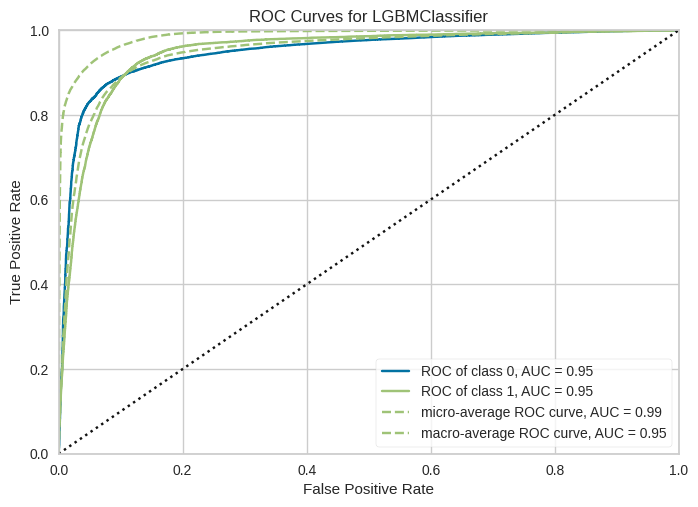

In [ ]:
plot_model(tuned_best_model, plot = 'auc')
#number for roc curves and categorization to poor to good to great

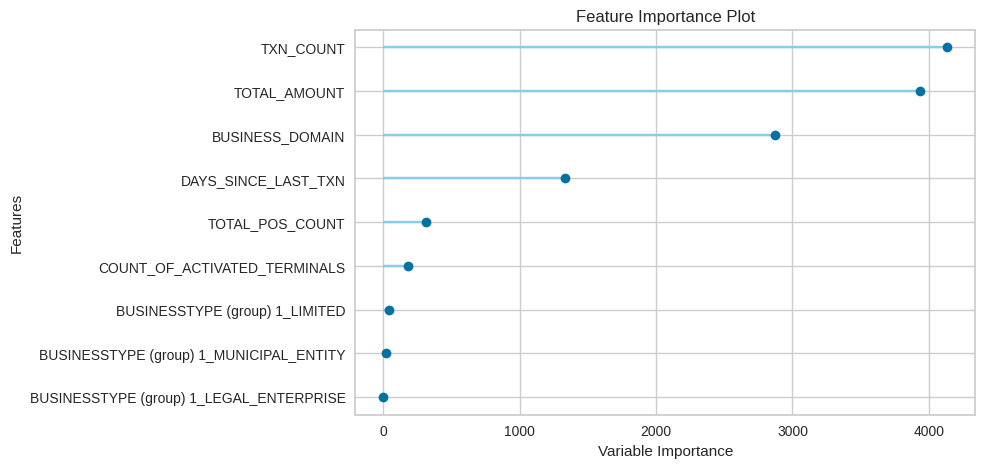

In [ ]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')
# print top 1 feature categorical

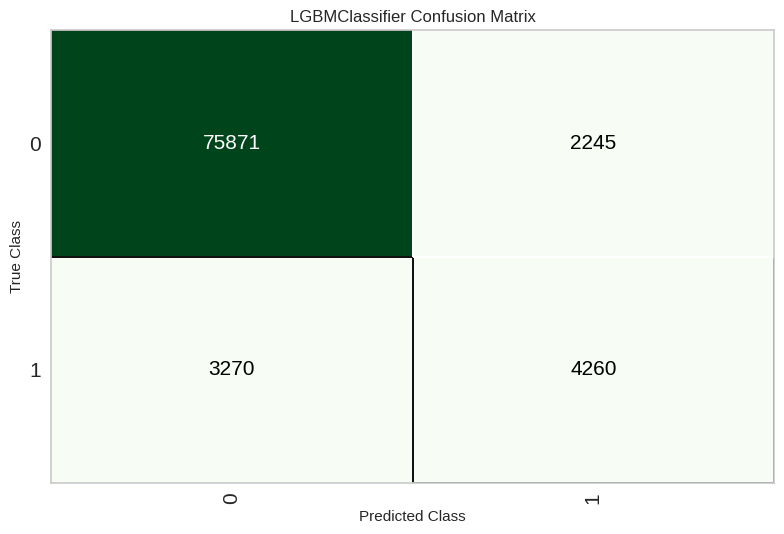

In [ ]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')
# add cm for test along this

In [ ]:
predictions = predict_model(tuned_best_model, data=test_data, probability_threshold=0.33)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7656,0.8564,0.3667,0.9535,0.5297,0.4121,0.4957


In [ ]:
predictions.columns

In [ ]:
test_data.columns

In [ ]:
predictions.head()

In [ ]:
save_model(tuned_best_model, 'saved_tuned_best_model_churn_prediction')


In [ ]:
saved_lr = load_model('saved_tuned_best_model_churn_prediction')


Transformation Pipeline and Model Successfully Loaded
